In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#load dataset 
df = pd.read_csv(r'T:\house-price-prediction\Clean_Data\CSV_files\house_clean.csv')

In [6]:
# Basic Info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nColumn Names:\n", df.columns.tolist())


Shape of dataset: (14620, 16)

Data Types:
 number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Number of schools nearby                   int64
Distance from the airport                  int64
Price                                      int64
dtype: object

Summary Statistics:
        number of bedrooms  number of bathrooms   living area      lot area  \
count        14620.000000         14620.000000  14620.0000

In [7]:
print(df.columns)

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')


In [8]:
# Check Null & Duplicate Values
print("Null values in dataset:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Null values in dataset:
 number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

Duplicate rows: 0


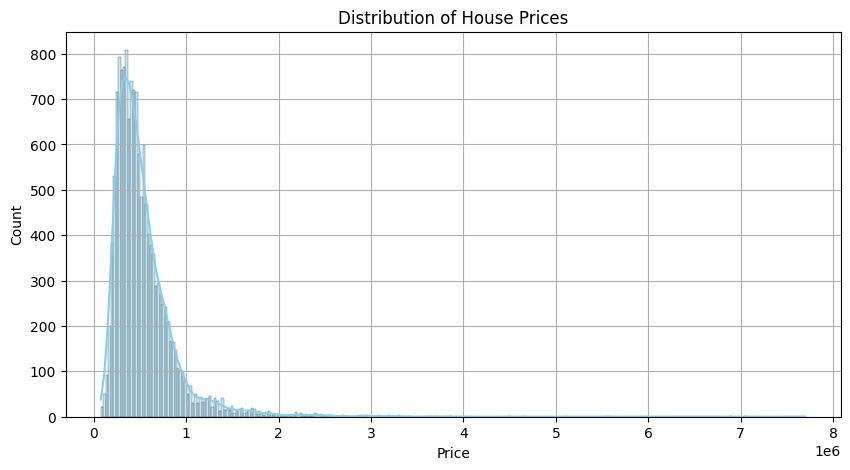

In [9]:
# Price Distribution Plot
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()


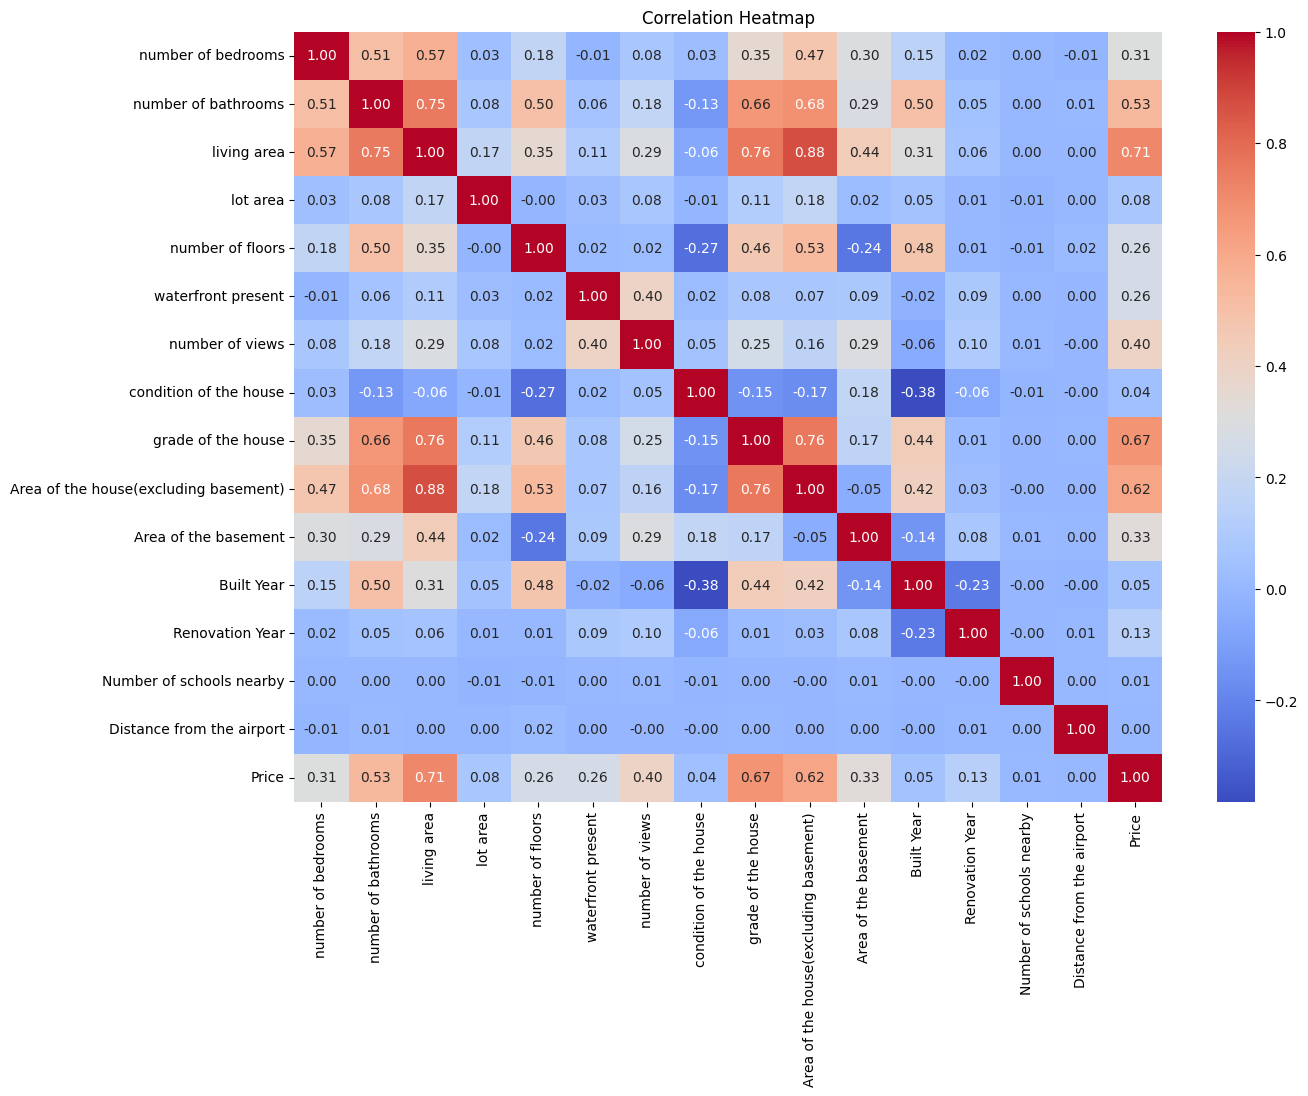

In [10]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


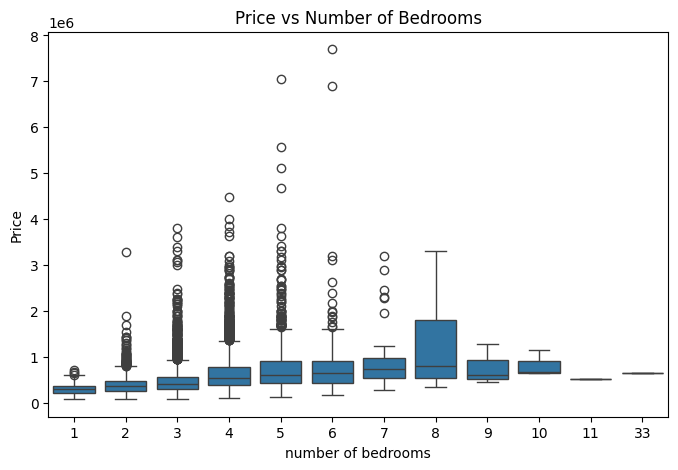

In [11]:
# Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title("Price vs Number of Bedrooms")
plt.show()


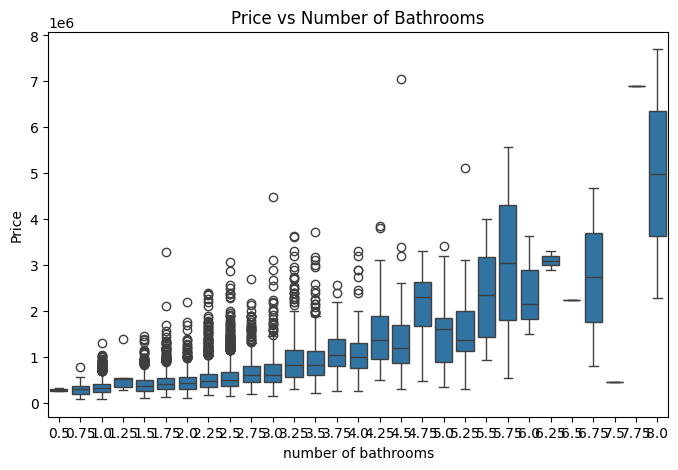

In [12]:
# Bathrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bathrooms', y='Price', data=df)
plt.title("Price vs Number of Bathrooms")
plt.show()


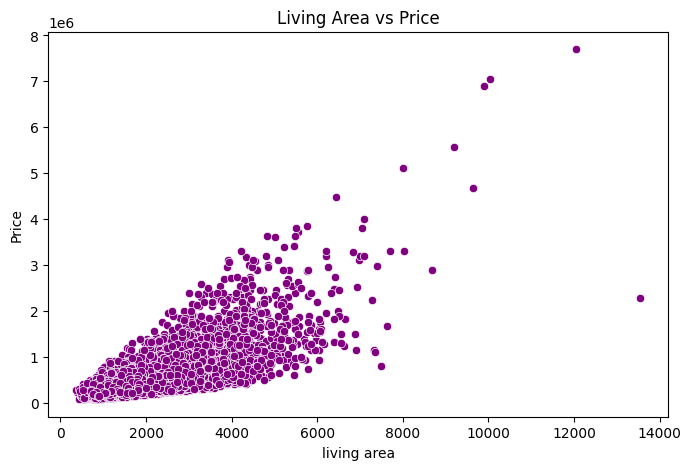

In [13]:
# Living Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='living area', y='Price', data=df, color='purple')
plt.title("Living Area vs Price")
plt.show()


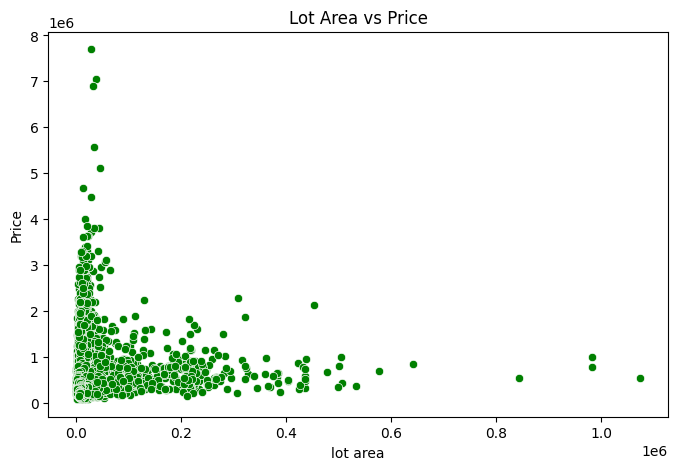

In [14]:
# Lot Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='lot area', y='Price', data=df, color='green')
plt.title("Lot Area vs Price")
plt.show()


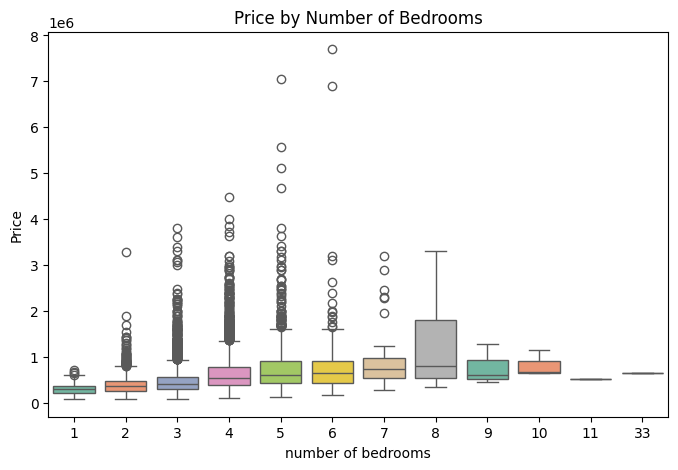

In [15]:
# Number of Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bedrooms', y='Price', data=df, palette='Set2')
plt.title("Price by Number of Bedrooms")
plt.show()


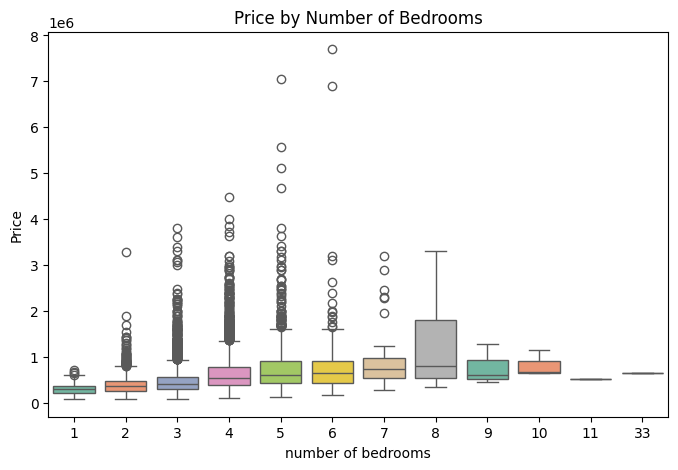

In [16]:
# Number of Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bedrooms', y='Price', data=df, palette='Set2')
plt.title("Price by Number of Bedrooms")
plt.show()

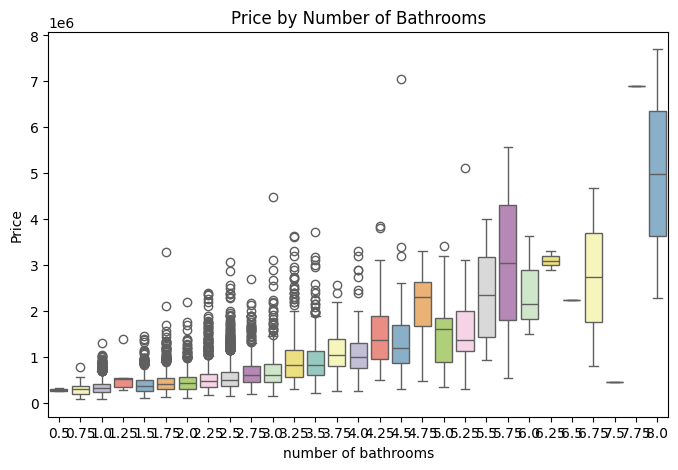

In [17]:
# Number of Bathrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='number of bathrooms', y='Price', data=df, palette='Set3')
plt.title("Price by Number of Bathrooms")
plt.show()


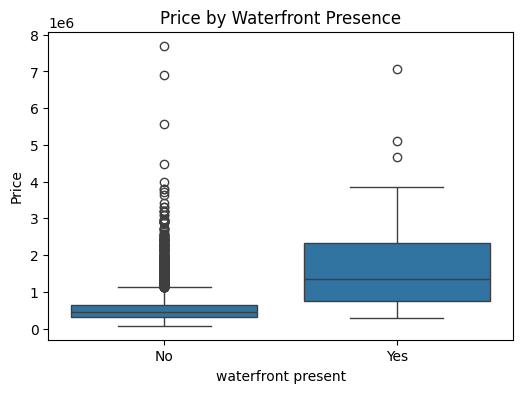

In [18]:
# Waterfront vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront present', y='Price', data=df)
plt.title("Price by Waterfront Presence")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


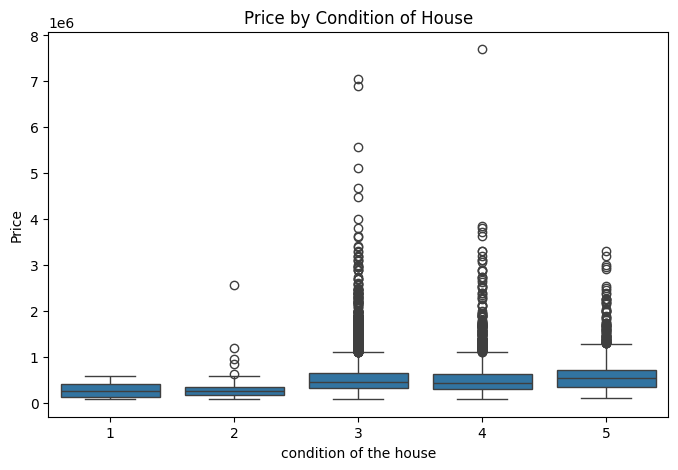

In [19]:
# Condition vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='condition of the house', y='Price', data=df)
plt.title("Price by Condition of House")
plt.show()


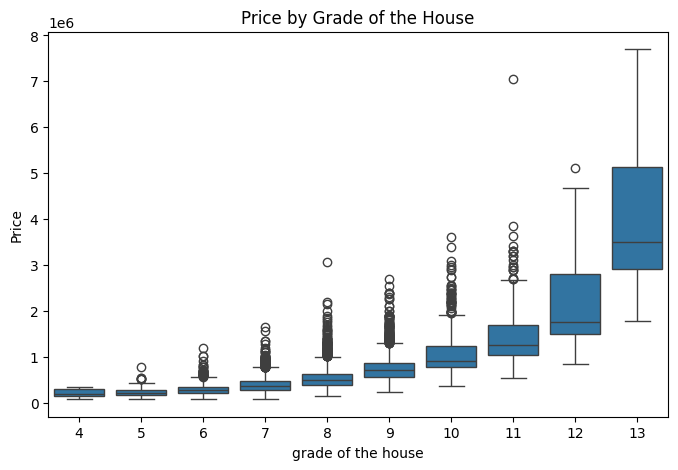

In [20]:
# Grade vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='grade of the house', y='Price', data=df)
plt.title("Price by Grade of the House")
plt.show()


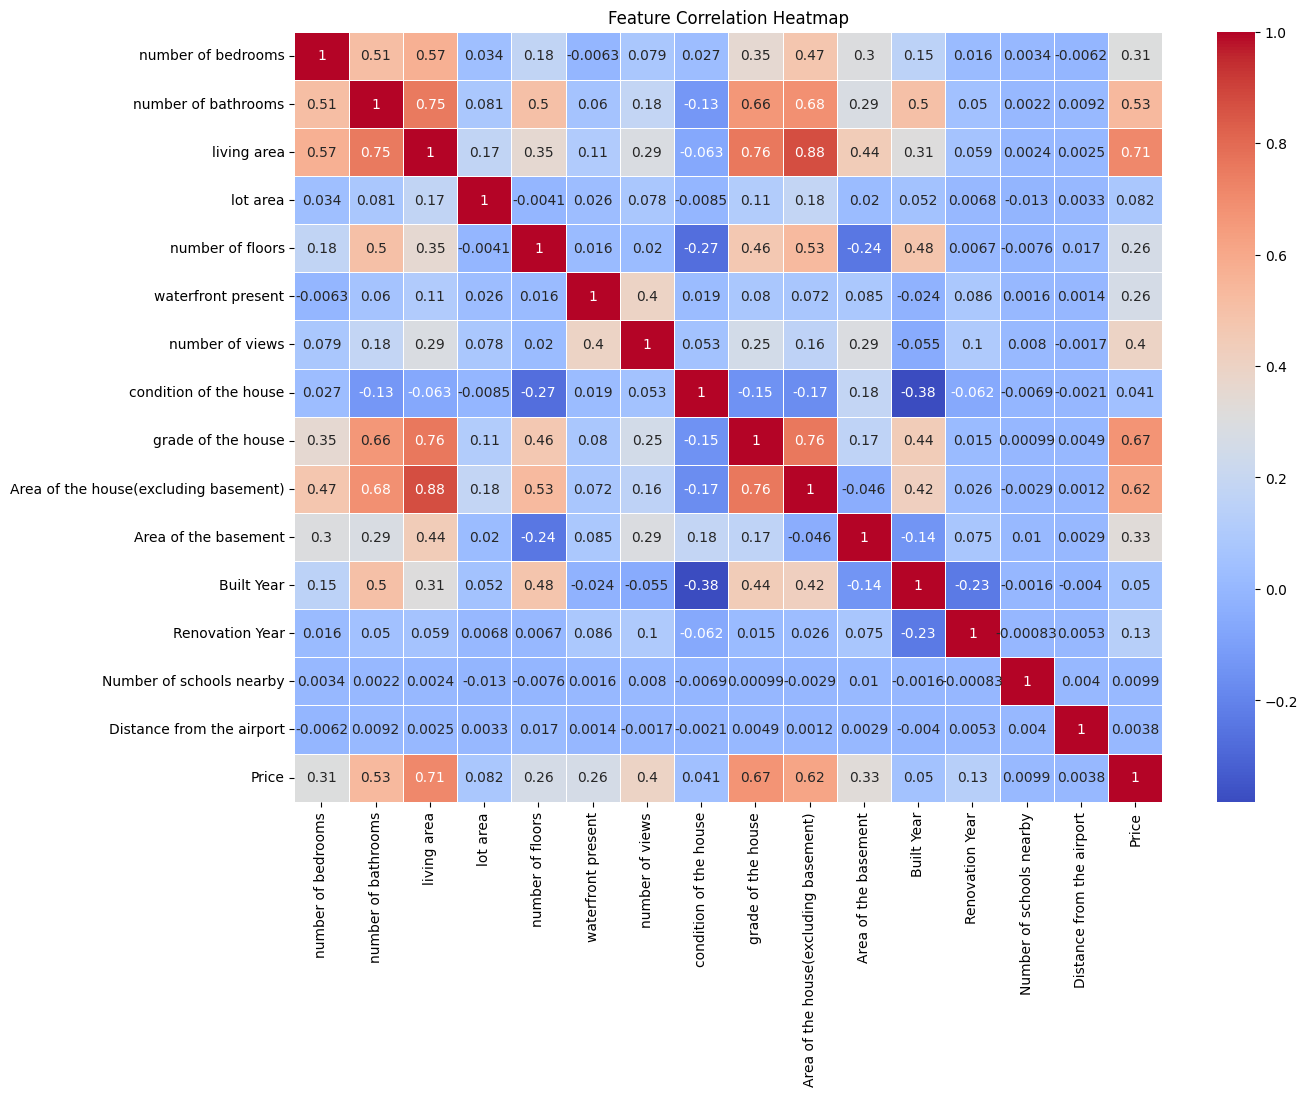

In [21]:
# Correlation Matrix
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


➤ Create a new feature: House Age

In [22]:
import datetime

# Assuming 'Built Year' means construction year, and current year is 2024
df['House Age'] = 2024 - df['Built Year']


In [23]:
➤ Create a Binary Feature: Recently Renovated

SyntaxError: invalid character '➤' (U+27A4) (725650284.py, line 1)

In [ ]:
# Any renovation after 2000 is considered recent
df['Recently Renovated'] = df['Renovation Year'].apply(lambda x: 1 if x > 2000 else 0)


Prepare Final Data for Modeling

In [ ]:
# Drop unnecessary columns:
df_model = df.drop(['Built Year', 'Renovation Year'], axis=1)


In [ ]:
# Separate Features and Target:
X = df_model.drop('Price', axis=1)
y = df_model['Price']


In [ ]:
# Train-test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Initialize model
lr_model = LinearRegression()


In [ ]:
# Train model
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predict on test data
y_pred = lr_model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance:
Mean Squared Error: 45258171069.67
R² Score: 0.6788


Model Evaluation Metrics Summary


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📈 Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 138110.35
Root Mean Squared Error (RMSE): 212739.68
R² Score: 0.6788


Try RandomForestRegressor
(Random Forest usually gives better accuracy for housing data.)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("🌲 Random Forest Regressor Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")


🌲 Random Forest Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 120752.94
Root Mean Squared Error (RMSE): 195723.68
R² Score: 0.7282


Comparison Plot:

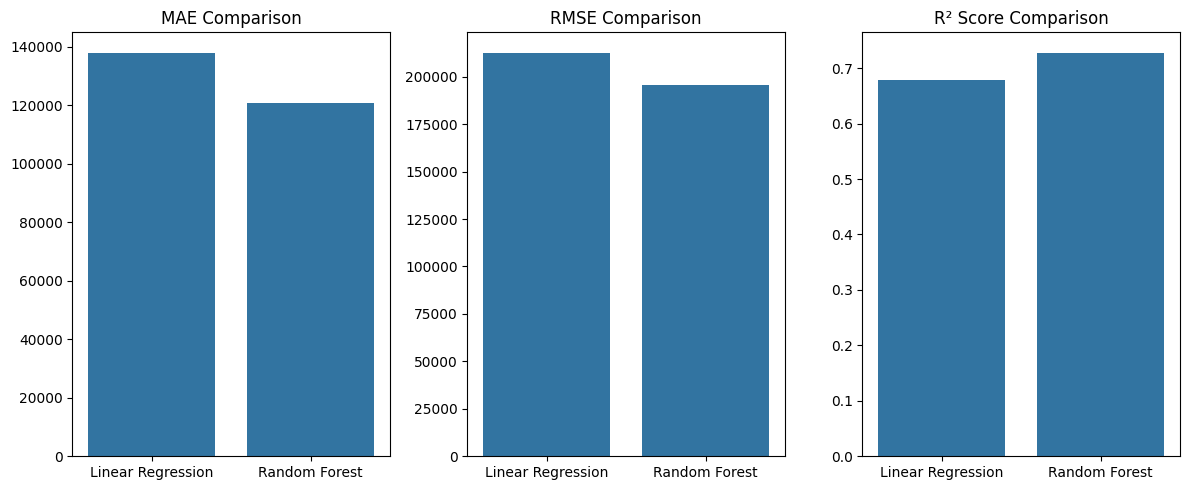

In [ ]:
models = ['Linear Regression', 'Random Forest']
maes = [mae, rf_mae]
rmses = [rmse, rf_rmse]
r2s = [r2, rf_r2]

plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=maes)
plt.title("MAE Comparison")

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=rmses)
plt.title("RMSE Comparison")

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2s)
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()


In [ ]:
# Predict prices for the test set
y_pred = rf_model.predict(X_test)
print(y_pred)


[ 391654.22  559763.66  466431.68 ... 1206806.    381413.42  621009.21]


 Prediction Accuracy per metric

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics for Random Forest:")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Evaluation Metrics for Random Forest:
Mean Absolute Error (MAE): ₹120752.94
Root Mean Squared Error (RMSE): ₹195723.68
R² Score: 0.7282


In [24]:
X = df.drop('Price', axis=1)
y = df['Price']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Model Evaluation Metrics:
✅ Mean Absolute Error (MAE): 138268.05
✅ R² Score: 0.6787
